# Supervised Learning Model

In [1]:
''' import relevant libraries'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
import statsmodels.formula.api as smf
import statsmodels.api
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
path = "arrest data .csv"

In [3]:
df = pd.read_csv(path)
df = df.fillna(0)

In [4]:
''' This creates a bin for each age group in the data provinded in the data set

    "Young" is defined as the ages 17 - 21 years
    "Mid Age" is defined as ages 21 - 30 years
    "Adult" is defined as ages 30 - 40 years
    
'''
data = df.copy()
bin_labels = ["Young", "Mid", "Adult"]
data['age'] = pd.cut(df['age'], bins = [17,21,30,40], labels = bin_labels)

In [5]:
data = pd.get_dummies(data)

In [6]:
employment_cols = ["emp" + str(i) for i in range(2, 25)] + ["emp" + str(i) for i in range(26, 52)]
columns_to_drop = employment_cols  # List the column names to be dropped
data = data.drop(columns=columns_to_drop)

In [7]:
''' Import train_test_split for the supervised learning
    
    This model is going to predict week of rearrest, given the other inputs such as age, race, etc
    
    '''
X = data.drop(['arrest'], axis=1)
y = data['arrest']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=111)

In [8]:
'''max iteration set to 10,000 because the data did not 
   converge within the maximum number of iterations using LogisticRegression()'''

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [9]:
def get_scores(y_true, y_pred):
    '''
    Return model evaluation metrics required
    '''
    return {
      'accuracy': accuracy_score(y_true, y_pred),
      'precision': precision_score(y_true, y_pred),
      'recall': recall_score(y_true, y_pred),
      'f1': f1_score(y_true, y_pred)
    }

In [14]:
y_pred = logreg.predict(X_test)
get_scores(y_test, y_pred)

{'accuracy': 0.9884393063583815,
 'precision': 1.0,
 'recall': 0.96,
 'f1': 0.9795918367346939}

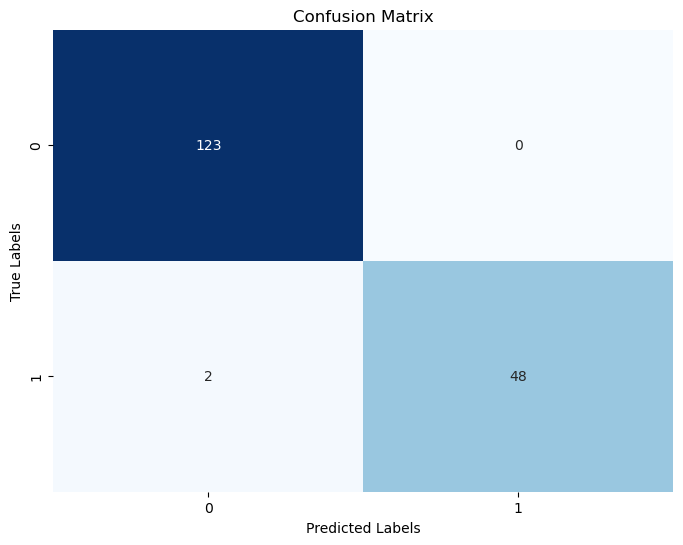

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [16]:
target_scaler = MinMaxScaler()
scale_y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1)).flatten()
model = RandomForestRegressor(random_state=42)
model.fit(X_train, scale_y_train)
y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
rmse = mean_squared_error(y_test,y_pred,squared=False)
print('RMSE', rmse)

RMSE 0.0761539359804726


# Accuracy
The model correctly predicts 98.8%% of the arrest week, given the data. 

# Precision
100% of the predictions made by the model as positives are true positives

# Recall
Around 96% of the true positive instances are correctly predicted.

# F1
This represents the harmonic mean of precision and recall. The resulting F1 of 97.95% indicates a balanced performance between the model precision and recall.

# RMSE
The RMSE of 0.076  indicates that, on average, the predictions the model deviate from the true values by approximately 0.076 units.